In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
data= pd.read_csv("delivery_time.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Checking whether the dataset has null values

In [27]:
data.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Renaming the columns

In [33]:
data =data.rename(columns={"Delivery Time": "DeliveryTime", "Sorting Time": "SortingTime"})

In [34]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


Boxplot

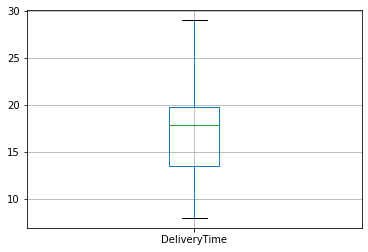

In [38]:
data.boxplot(column=['DeliveryTime'])

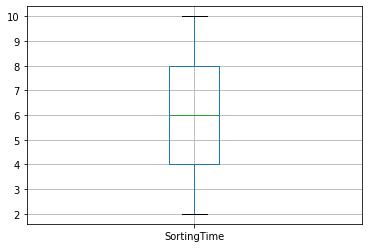

In [40]:
data.boxplot(column=['SortingTime'])

Histogram

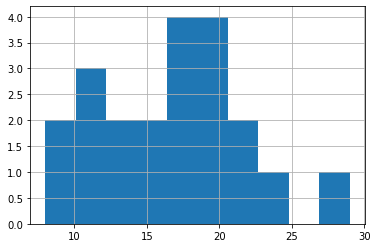

In [41]:
data['DeliveryTime'].hist()


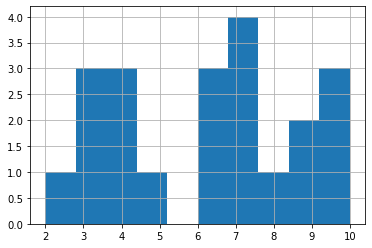

In [42]:
data['SortingTime'].hist()

In [43]:
#Descriptive stat
data['SortingTime'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: SortingTime, dtype: float64

In [44]:
data['DeliveryTime'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: DeliveryTime, dtype: float64

Scatter plot

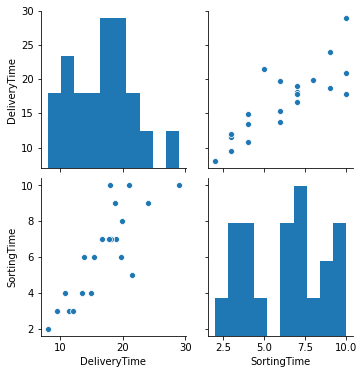

In [45]:
sns.pairplot(data)

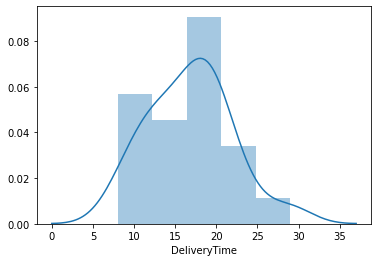

In [7]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

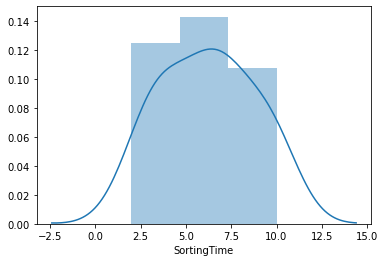

In [46]:
sns.distplot(data['SortingTime'])

# SLR Model

In [64]:
import statsmodels.formula.api as smf
model = smf.ols("data['DeliveryTime']~data['SortingTime']",data = data).fit()

In [65]:
print(model.summary())
prediction = model.predict(data.iloc[:,1])

                             OLS Regression Results                             
Dep. Variable:     data['DeliveryTime']   R-squared:                       0.682
Model:                              OLS   Adj. R-squared:                  0.666
Method:                   Least Squares   F-statistic:                     40.80
Date:                  Mon, 09 Nov 2020   Prob (F-statistic):           3.98e-06
Time:                          22:55:03   Log-Likelihood:                -51.357
No. Observations:                    21   AIC:                             106.7
Df Residuals:                        19   BIC:                             108.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

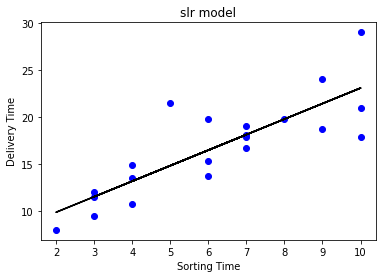

In [66]:
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='b',marker='o')
plt.plot(data['SortingTime'],prediction,color='black')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("slr model")
plt.show()

In [ ]:
#Log Model

In [82]:
l_model = smf.ols("data['DeliveryTime']~np.log(data['SortingTime'])",data = data).fit()

In [83]:
print(l_model.summary())

                             OLS Regression Results                             
Dep. Variable:     data['DeliveryTime']   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Mon, 09 Nov 2020   Prob (F-statistic):           2.64e-06
Time:                          23:02:22   Log-Likelihood:                -50.912
No. Observations:                    21   AIC:                             105.8
Df Residuals:                        19   BIC:                             107.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [84]:
prediction_l = l_model.predict(pd.DataFrame(data['SortingTime']))

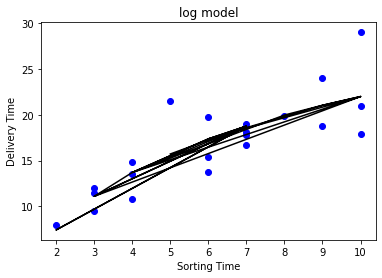

In [81]:
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='b',marker='o')
plt.plot(data['SortingTime'],prediction_l,color='black')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("log model")
plt.show()

Exponential model

In [85]:
e_model = smf.ols("np.log(data['DeliveryTime'])~(data['SortingTime'])",data = data).fit()

In [86]:
print(e_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(data['DeliveryTime'])   R-squared:                       0.711
Model:                                      OLS   Adj. R-squared:                  0.696
Method:                           Least Squares   F-statistic:                     46.73
Date:                          Mon, 09 Nov 2020   Prob (F-statistic):           1.59e-06
Time:                                  23:05:22   Log-Likelihood:                 7.7920
No. Observations:                            21   AIC:                            -11.58
Df Residuals:                                19   BIC:                            -9.495
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [87]:
e_prediction = e_model.predict(pd.DataFrame(data['SortingTime']))

In [88]:
e_prediction=np.exp(e_prediction)

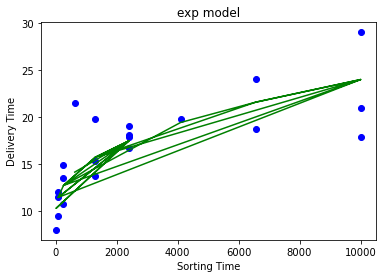

In [98]:
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='b',marker='o')
plt.plot(data['SortingTime'],e_prediction,color='green')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("exp model")
plt.show()

In [92]:
#Quadratic equation

In [94]:
data['SortingTime']=data.SortingTime*data.SortingTime
q_model =  smf.ols("data['DeliveryTime']~data['SortingTime']",data=data).fit()

In [95]:
q_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     data['DeliveryTime']   R-squared:                       0.513
Model:                              OLS   Adj. R-squared:                  0.487
Method:                   Least Squares   F-statistic:                     20.00
Date:                  Mon, 09 Nov 2020   Prob (F-statistic):           0.000261
Time:                          23:15:26   Log-Likelihood:                -55.845
No. Observations:                    21   AIC:                             115.7
Df Residuals:                        19   BIC:                             117.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.7161      1.050     13.068      0.000      11.519      15.913
data['SortingTime']     0.0010      0.000      4.472      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.404
Skew:                           0.091   Prob(JB):                        0.817
Kurtosis:                       2.345   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
prediction_q = q_model.predict(pd.DataFrame(data['SortingTime']))

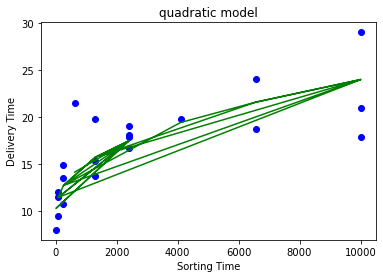

In [97]:
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='b',marker='o')
plt.plot(data['SortingTime'],e_prediction,color='green')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("quadratic model")
plt.show()